MIT License

Copyright (c) 2025 Jędrzej Kubica

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

In [1]:
import pandas
import numpy

import matplotlib.pyplot

In [2]:
RECOMBINATION_MAP_MAT = "data/DecodeGenetics/DecodeGenetics-PalssonEtAl_Nature_2024-8e49794/data/maps/maps.mat.tsv"
RECOMBINATION_MAP_PAT = "data/DecodeGenetics/DecodeGenetics-PalssonEtAl_Nature_2024-8e49794/data/maps/maps.pat.tsv"

In [4]:
mat = pandas.read_csv(RECOMBINATION_MAP_MAT,
                      sep="\t",
                      comment="#",
                      dtype={"Chr": str,
                             "pos": numpy.uint32,
                             "map": numpy.float32,
                             "cMperMb": numpy.float32,
                             "DSB": numpy.float32,
                             "deltaDSB": numpy.float32,
                             "oNCO": numpy.float32})  

mat.head()

,Chr,pos,map,cMperMb,DSB,deltaDSB,oNCO
0,chr1,500000,0.046573,0.051549,0.187325,0.957985,0.000246
1,chr1,1500000,0.056686,0.369854,0.234142,0.775422,0.000677
2,chr1,2500000,0.088094,1.226029,0.376897,0.575033,0.002276
3,chr1,3500000,0.072099,1.958981,0.327574,0.309961,0.002768
4,chr1,4500000,0.063192,2.523875,0.303244,0.127192,0.002952


In [5]:
# use only one chromosome for now
CHR = "chr6"

mat_chr = mat[mat["Chr"] == CHR]
mat_chr.reset_index(inplace=True, drop=True)

mat_chr.head()

,Chr,pos,map,cMperMb,DSB,deltaDSB,oNCO
0,chr6,500000,0.038624,0.515999,0.164818,0.588563,0.001046
1,chr6,1500000,0.038267,0.554760,0.164161,0.561208,0.001661
2,chr6,2500000,0.050168,1.152855,0.223728,0.383590,0.002399
3,chr6,3500000,0.045924,1.539145,0.214478,0.212296,0.001907
4,chr6,4500000,0.057424,2.145647,0.272609,0.159825,0.002030


In [6]:
# use DSB (double-strand breaks, DSBs/Mb per meiosis),
# PRDM9-driven DSBs correspond strongly with recombination hotspots
recomb_rates = mat_chr["DSB"].to_numpy()

# find positions with recombination rate > 2*avg
avg_recomb_rate = numpy.average(recomb_rates)
high_recomb_pos = mat_chr["pos"][mat_chr["DSB"] > 2 * avg_recomb_rate].to_numpy()
high_recomb_rates = mat_chr["DSB"][mat_chr["pos"].isin(high_recomb_pos)].to_numpy()

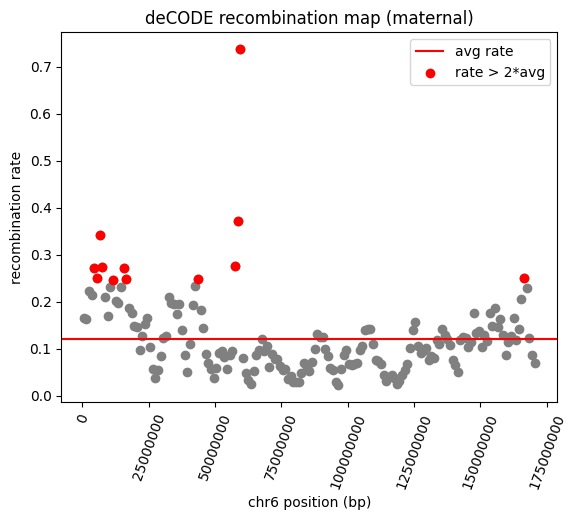

In [7]:
# plot the recombination rates along the chromosome,
# identify haploblock boundaries as recombination rate > 2*avg
matplotlib.pyplot.figure()

matplotlib.pyplot.scatter(x=mat_chr["pos"].to_numpy(), y=recomb_rates, color="grey")
matplotlib.pyplot.axhline(avg_recomb_rate, color="red", label="avg rate")

# color red the high recombination positions
matplotlib.pyplot.scatter(x=high_recomb_pos,
                          y=high_recomb_rates,
                          color="red",
                          label="rate > 2*avg")

matplotlib.pyplot.title("deCODE recombination map (maternal)")
matplotlib.pyplot.ticklabel_format(useOffset=False, style='plain')  # disable scientific notation
matplotlib.pyplot.xlabel(f"{CHR} position (bp)")
matplotlib.pyplot.ylabel("recombination rate")
matplotlib.pyplot.xticks(rotation=70)

matplotlib.pyplot.legend()

matplotlib.pyplot.savefig(f"figures/recomb_map_{CHR}_mat_outliersAVG.png", bbox_inches='tight')
matplotlib.pyplot.show()

In [8]:
print(len(high_recomb_pos), "high recombination positions (rate > 2*avg):")
for pos, rate in zip(high_recomb_pos, high_recomb_rates):
    print(f"{CHR}:{pos}\trecombination rate: {rate} DSBs/Mb per meiosis")

12 high recombination positions (rate > 2*avg):
chr6:4500000	recombination rate: 0.2726089060306549 DSBs/Mb per meiosis
chr6:5500000	recombination rate: 0.2507183849811554 DSBs/Mb per meiosis
chr6:6500000	recombination rate: 0.34163784980773926 DSBs/Mb per meiosis
chr6:7500000	recombination rate: 0.2730921804904938 DSBs/Mb per meiosis
chr6:11500000	recombination rate: 0.24522000551223755 DSBs/Mb per meiosis
chr6:15500000	recombination rate: 0.27179062366485596 DSBs/Mb per meiosis
chr6:16500000	recombination rate: 0.24810494482517242 DSBs/Mb per meiosis
chr6:43500000	recombination rate: 0.24928732216358185 DSBs/Mb per meiosis
chr6:57500000	recombination rate: 0.27551886439323425 DSBs/Mb per meiosis
chr6:58500000	recombination rate: 0.37233930826187134 DSBs/Mb per meiosis
chr6:59500000	recombination rate: 0.7373786568641663 DSBs/Mb per meiosis
chr6:166500000	recombination rate: 0.25078296661376953 DSBs/Mb per meiosis


In [9]:
# prepare table for github readme
print("\n| Position | Recombination rate (DSBs/Mb per meiosis) |")
print("|----------|------------------------------------------|")
for pos, rate in zip(high_recomb_pos, high_recomb_rates):
    print(f"| {CHR}:{pos} | {rate} |")


| Position | Recombination rate (DSBs/Mb per meiosis) |
|----------|------------------------------------------|
| chr6:4500000 | 0.2726089060306549 |
| chr6:5500000 | 0.2507183849811554 |
| chr6:6500000 | 0.34163784980773926 |
| chr6:7500000 | 0.2730921804904938 |
| chr6:11500000 | 0.24522000551223755 |
| chr6:15500000 | 0.27179062366485596 |
| chr6:16500000 | 0.24810494482517242 |
| chr6:43500000 | 0.24928732216358185 |
| chr6:57500000 | 0.27551886439323425 |
| chr6:58500000 | 0.37233930826187134 |
| chr6:59500000 | 0.7373786568641663 |
| chr6:166500000 | 0.25078296661376953 |


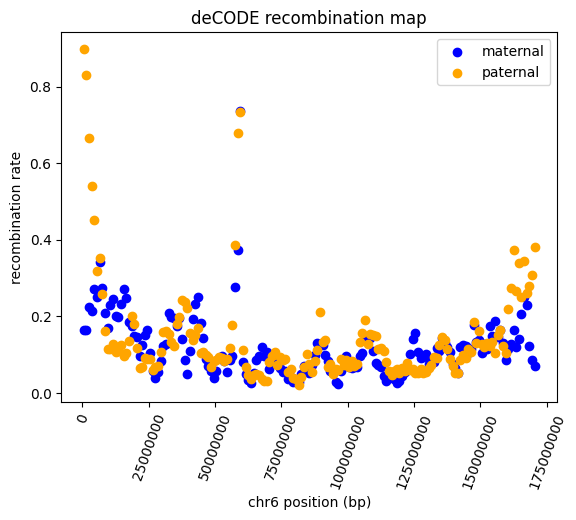

In [15]:
# compare maternal and paternal recombination maps
pat = pandas.read_csv(RECOMBINATION_MAP_PAT,
                      sep="\t",
                      comment="#",
                      dtype={"Chr": str,
                             "pos": numpy.uint32,
                             "map": numpy.float32,
                             "cMperMb": numpy.float32,
                             "DSB": numpy.float32,
                             "deltaDSB": numpy.float32,
                             "oNCO": numpy.float32})

pat_chr = pat[pat["Chr"] == CHR]

pat_chr.reset_index(inplace=True, drop=True)
pat_recomb_rates = pat_chr["DSB"].to_numpy()

matplotlib.pyplot.figure()
matplotlib.pyplot.scatter(x=mat_chr["pos"].to_numpy(), y=recomb_rates
                          , color="blue", label="maternal")
matplotlib.pyplot.scatter(x=pat_chr["pos"].to_numpy(), y=pat_recomb_rates
                            , color="orange", label="paternal")
matplotlib.pyplot.title("deCODE recombination map")
matplotlib.pyplot.ticklabel_format(useOffset=False, style='plain')  # disable scientific notation
matplotlib.pyplot.xlabel(f"{CHR} position (bp)")
matplotlib.pyplot.ylabel("recombination rate")
matplotlib.pyplot.xticks(rotation=70)
matplotlib.pyplot.legend()

matplotlib.pyplot.savefig(f"figures/recomb_map_{CHR}_mat_vs_pat.png", bbox_inches='tight')
matplotlib.pyplot.show()

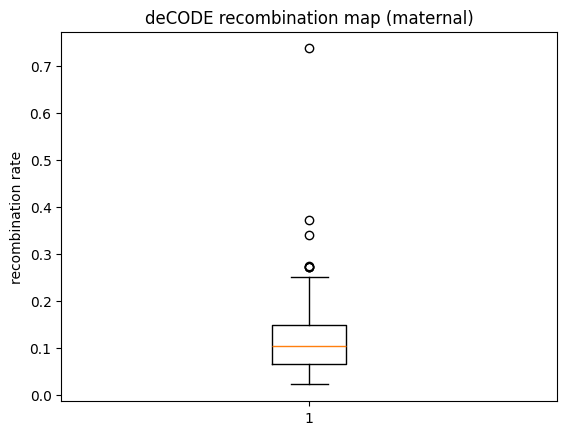

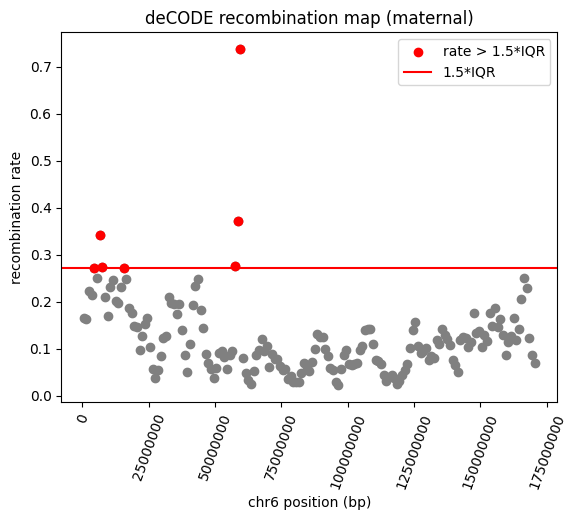

In [16]:
# plot the recombination rate distribution,
# identify haploblock boundaries as recombination rate > 1.5*IQR
matplotlib.pyplot.figure()
matplotlib.pyplot.boxplot(recomb_rates, vert=True)

matplotlib.pyplot.title("deCODE recombination map (maternal)")
matplotlib.pyplot.ylabel("recombination rate")

matplotlib.pyplot.savefig(f"figures/recomb_map_{CHR}_mat_boxplot.png", bbox_inches='tight')
matplotlib.pyplot.show()

# get top outliers
q75, q25 = numpy.percentile(recomb_rates, [75, 25])
iqr = q75 - q25
upper_bound = q75 + (1.5 * iqr)
lower_bound = q25 - (1.5 * iqr)
outliers = mat_chr["pos"][ (recomb_rates > upper_bound) | (recomb_rates < lower_bound) ].to_numpy()
outlier_rates = mat_chr["DSB"][ (recomb_rates > upper_bound) | (recomb_rates < lower_bound) ].to_numpy()

matplotlib.pyplot.figure()
matplotlib.pyplot.scatter(x=mat_chr["pos"].to_numpy(),
                          y=recomb_rates,
                          color="grey")
matplotlib.pyplot.scatter(x=outliers,
                          y=outlier_rates,
                          color="red",
                          label="rate > 1.5*IQR")
matplotlib.pyplot.axhline(upper_bound, color="red", label="1.5*IQR")
matplotlib.pyplot.title("deCODE recombination map (maternal)")
matplotlib.pyplot.ticklabel_format(useOffset=False, style='plain')  # disable scientific notation
matplotlib.pyplot.xlabel(f"{CHR} position (bp)")
matplotlib.pyplot.ylabel("recombination rate")
matplotlib.pyplot.xticks(rotation=70)
matplotlib.pyplot.legend()

matplotlib.pyplot.savefig(f"figures/recomb_map_{CHR}_mat_outliersIQR.png", bbox_inches='tight')
matplotlib.pyplot.show()

In [17]:
# print haploblock boundaries
high_recomb_pos = outliers
high_recomb_rates = mat_chr["DSB"][mat_chr["pos"].isin(high_recomb_pos)].to_numpy()
print(len(high_recomb_pos), "high recombination positions (rate > 1.5*IQR):")
for pos, rate in zip(high_recomb_pos, high_recomb_rates):
    print(f"{CHR}:{pos}\trecombination rate: {rate} DSBs/Mb per meiosis")

7 high recombination positions (rate > 1.5*IQR):
chr6:4500000	recombination rate: 0.2726089060306549 DSBs/Mb per meiosis
chr6:6500000	recombination rate: 0.34163784980773926 DSBs/Mb per meiosis
chr6:7500000	recombination rate: 0.2730921804904938 DSBs/Mb per meiosis
chr6:15500000	recombination rate: 0.27179062366485596 DSBs/Mb per meiosis
chr6:57500000	recombination rate: 0.27551886439323425 DSBs/Mb per meiosis
chr6:58500000	recombination rate: 0.37233930826187134 DSBs/Mb per meiosis
chr6:59500000	recombination rate: 0.7373786568641663 DSBs/Mb per meiosis


In [18]:
# prepare table for github readme with title
print("\n| Position | Recombination rate (DSBs/Mb per meiosis) |")
print("|----------|------------------------------------------|")
for pos, rate in zip(high_recomb_pos, high_recomb_rates):
    print(f"| {CHR}:{pos} | {rate} |")


| Position | Recombination rate (DSBs/Mb per meiosis) |
|----------|------------------------------------------|
| chr6:4500000 | 0.2726089060306549 |
| chr6:6500000 | 0.34163784980773926 |
| chr6:7500000 | 0.2730921804904938 |
| chr6:15500000 | 0.27179062366485596 |
| chr6:57500000 | 0.27551886439323425 |
| chr6:58500000 | 0.37233930826187134 |
| chr6:59500000 | 0.7373786568641663 |


In [32]:
# use DSB (double-strand breaks, DSBs/Mb per meiosis),
# PRDM9-driven DSBs correspond strongly with recombination hotspots
recomb_rates = mat_chr["DSB"].to_numpy()

In [33]:
i = 0
print(recomb_rates[i])
print(recomb_rates[max(0, i-3):min(len(recomb_rates), i+3)])
numpy.average(recomb_rates[max(0, i-3):min(len(recomb_rates), i+3)])

0.16481763
[0.16481763 0.1641612  0.2237282 ]


np.float32(0.18423568)

In [44]:
high_recomb_pos = []
high_recomb_rates = []

for i in range(len(recomb_rates)):
    # take average of +-300kb
    surroundings_average = numpy.average(recomb_rates[max(0, i-3):min(len(recomb_rates), i+3)])
    if recomb_rates[i] > surroundings_average:
        high_recomb_pos.append(mat_chr["pos"][i])
        high_recomb_rates.append(recomb_rates[i])
        print(f"High recombination rate at {CHR}:{mat_chr['pos'][i]}: {recomb_rates[i]} DSBs/Mb per meiosis (avg of surroundings: {surroundings_average})")

High recombination rate at chr6:2500000: 0.22372819483280182 DSBs/Mb per meiosis (avg of surroundings: 0.20795872807502747)
High recombination rate at chr6:4500000: 0.2726089060306549 DSBs/Mb per meiosis (avg of surroundings: 0.24455536901950836)
High recombination rate at chr6:6500000: 0.34163784980773926 DSBs/Mb per meiosis (avg of surroundings: 0.2604057192802429)
High recombination rate at chr6:7500000: 0.2730921804904938 DSBs/Mb per meiosis (avg of surroundings: 0.25294870138168335)
High recombination rate at chr6:10500000: 0.2309345155954361 DSBs/Mb per meiosis (avg of surroundings: 0.2216234803199768)
High recombination rate at chr6:11500000: 0.24522000551223755 DSBs/Mb per meiosis (avg of surroundings: 0.20907016098499298)
High recombination rate at chr6:15500000: 0.27179062366485596 DSBs/Mb per meiosis (avg of surroundings: 0.22272945940494537)
High recombination rate at chr6:16500000: 0.24810494482517242 DSBs/Mb per meiosis (avg of surroundings: 0.21860967576503754)
High reco

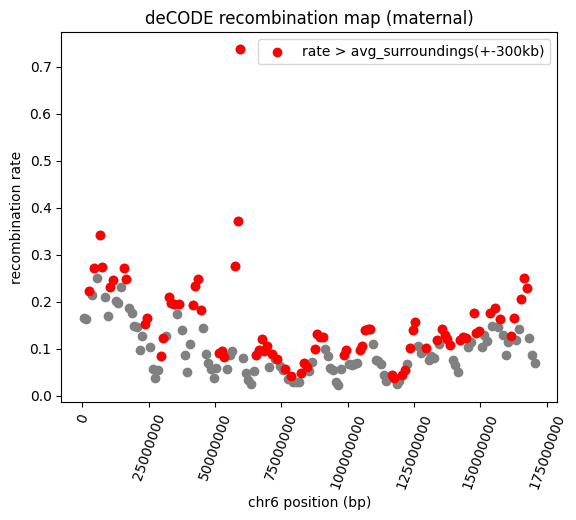

In [45]:
# plot the recombination rates along the chromosome,
# identify haploblock boundaries as recombination rate > 2*avg
matplotlib.pyplot.figure()

matplotlib.pyplot.scatter(x=mat_chr["pos"].to_numpy(), y=recomb_rates, color="grey")

# color red the high recombination positions
matplotlib.pyplot.scatter(x=high_recomb_pos,
                          y=high_recomb_rates,
                          color="red",
                          label="rate > avg_surroundings(+-300kb)")

matplotlib.pyplot.title("deCODE recombination map (maternal)")
matplotlib.pyplot.ticklabel_format(useOffset=False, style='plain')  # disable scientific notation
matplotlib.pyplot.xlabel(f"{CHR} position (bp)")
matplotlib.pyplot.ylabel("recombination rate")
matplotlib.pyplot.xticks(rotation=70)

matplotlib.pyplot.legend()

matplotlib.pyplot.savefig(f"figures/recomb_map_{CHR}_mat_outliersAVGsurroundings.png", bbox_inches='tight')
matplotlib.pyplot.show()